In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch

In [2]:
# (do not change this code)
words = open('names.txt').read().splitlines()

In [3]:
# (do not change this code)
chars = sorted(list(set([c for w in words for c in w])))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0

In [4]:
# (do not change this code)
itos = {i:s for s,i in stoi.items()}

In [ ]:
# Exercise 1: build a simple bigram model for next-character prediction
# - store the co-counts of each character in a 27x27 matrix N
# - compute the normalized probabilities into a matrix P
# - generate a bunch of samples from the model using P and torch.multinomial

In [5]:
N = torch.zeros((27,27))
for w in words:
    w = '.' + w + '.'
    k = len(w)
    for i in range(k-1):
        j = i+1
        c1 = w[i]
        c2 = w[j]
        i1 = stoi[c1]
        i2 = stoi[c2]
        N[i1][i2] +=1


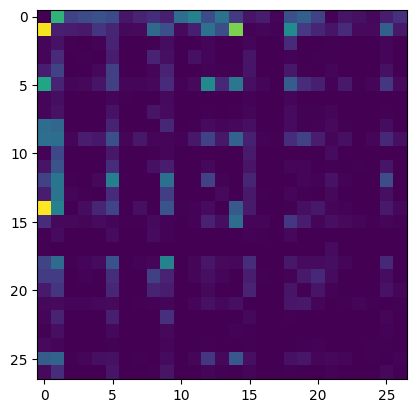

In [6]:
# display the matrix
plt.imshow(N)
plt.show()

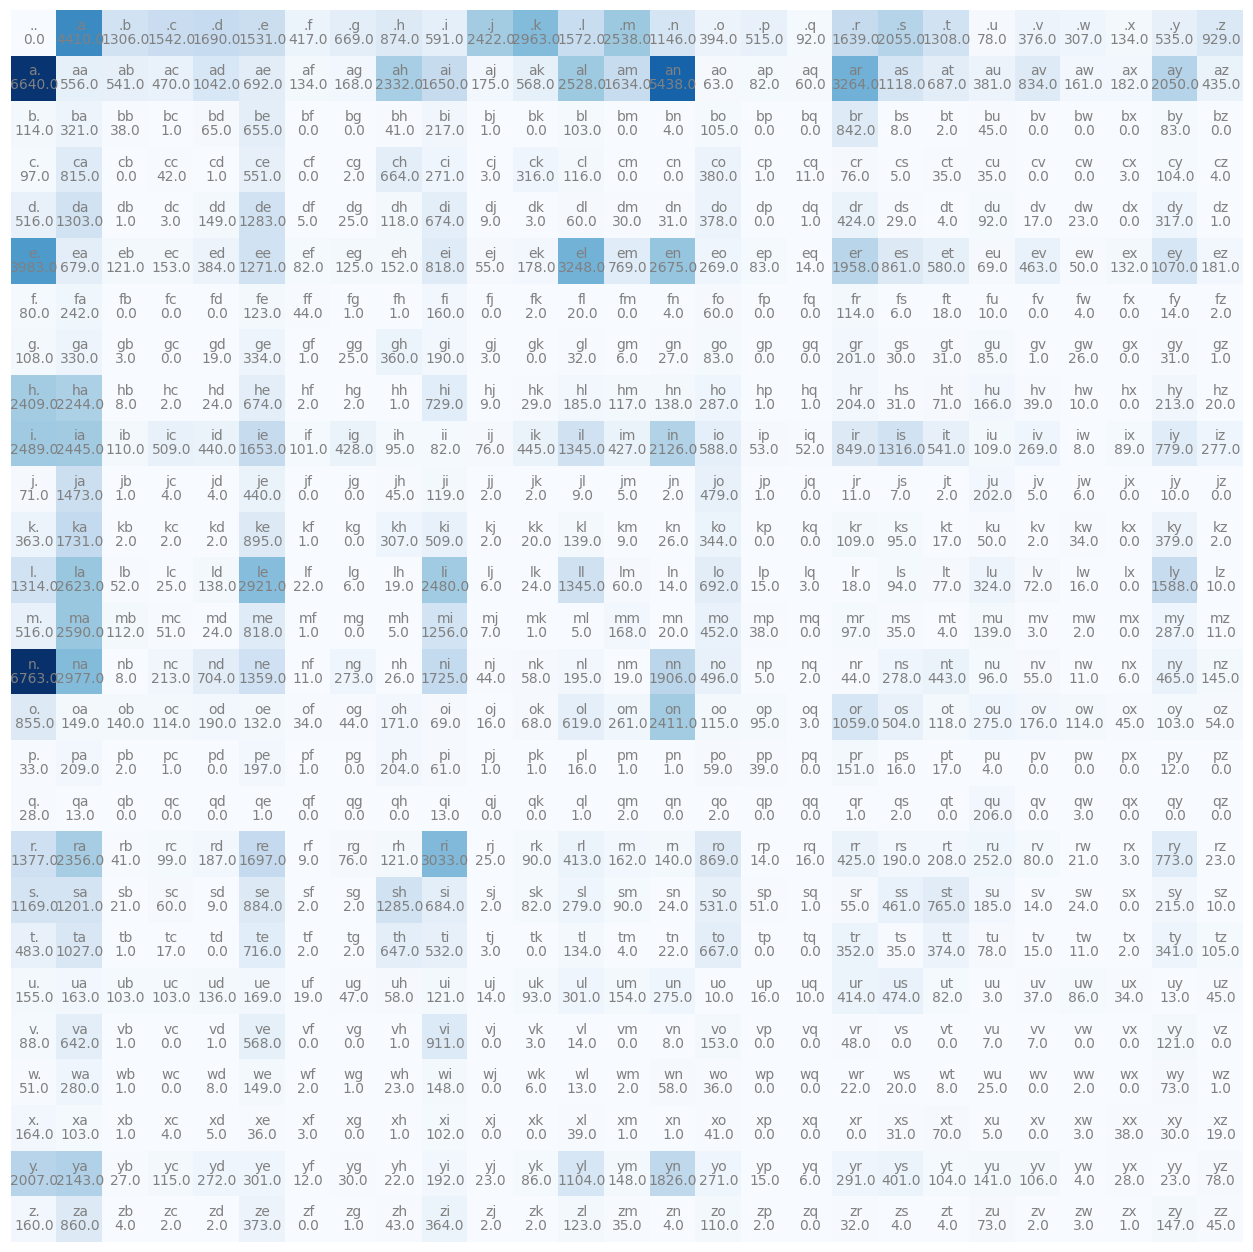

In [7]:
#display the matrix in human-readable format
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off')
plt.show()

In [19]:
# useful to reproduce results
g = torch.Generator().manual_seed(2147483647)

In [20]:
P = N/N.sum(axis=1,keepdim=True)

In [ ]:
# sample 30 words from the model (hint: use torch.multinomial)
for _ in range(30):
    ix = 0
    out = []
    while True:
        p = P[ix]
        ix =  torch.multinomial(p, num_samples=1, replacement=True,generator = g).item()
        if ix == 0:
            break
        out.append(itos[ix])
    print(''.join(out))

cexze
momasurailezitynn
konimittain
llayn
ka
da
staiyaubrtthrigotai
moliellavo
ke
teda
ka
emimmsade
enkaviyny
ftlspihinivenvorhlasu
dsor
br
jol
pen
aisan
ja
feniee
zem
deru
firit
gaikajahahbevare
kiysthelenaririenah
keen
x
al
kal


In [ ]:
# Exercise 2: build the same bigram model using the NLL loss
# - the dataset is created and encoded for you
# - create the weights matrix W
# - build a training loop to minimize the NLL
# - sample from the model

In [22]:
# create a training set for bigram model
# (do not change this code) 
xs = []
ys = []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()

In [23]:
import torch.nn.functional as F

In [36]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27),generator=g)
W.requires_grad=True

In [37]:
# training loop
for k in range(2000):
    #forward pass
    xenc = F.one_hot(xs, num_classes=27).float() # encode xs with F.one_hot
    logits = xenc @ W
    counts = logits.exp()
    probs = counts/counts.sum(axis=1, keepdim =True)
    loss = -probs[torch.arange(len(ys)), ys].log().mean()

    # backward pass
    loss.backward()

    # update
    W.data += -10 * W.grad
    W.grad = None

    print(loss.item())

3.758953809738159
3.6702587604522705
3.591153860092163
3.520017623901367
3.4557948112487793
3.397716522216797
3.3451638221740723
3.2975902557373047
3.2544844150543213
3.2153542041778564
3.1797327995300293
3.1471893787384033
3.117339611053467
3.0898516178131104
3.064443588256836
3.0408785343170166
3.0189590454101562
2.998518705368042
2.9794163703918457
2.9615297317504883
2.9447529315948486
2.92899227142334
2.9141643047332764
2.9001941680908203
2.887012243270874
2.874558448791504
2.862776279449463
2.851613759994507
2.841024398803711
2.830965518951416
2.8213980197906494
2.812286138534546
2.8035969734191895
2.7953009605407715
2.7873709201812744
2.7797818183898926
2.7725107669830322
2.7655375003814697
2.7588419914245605
2.7524070739746094
2.7462172508239746
2.7402572631835938
2.734513998031616
2.7289750576019287
2.7236287593841553
2.7184643745422363
2.713472366333008
2.708644390106201
2.7039713859558105
2.699446678161621
2.6950621604919434
2.6908111572265625
2.6866886615753174
2.68268847465

In [38]:
# finally, sample from the neural net model
g = torch.Generator().manual_seed(2147483647)

for k in range(10):
    out = []
    ix = 0
    for _ in range(10):
        x = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = x @ W
        counts = logits.exp()
        probs = counts/counts.sum(axis=1, keepdim =True)
        ix = torch.multinomial(probs, num_samples=1, replacement=True,generator = g).item()
        if ix == 0:
            break
        out.append(itos[ix])
    print(''.join(out))

cexze
momasurail
azitynn
konimittai
n
llayn
ka
da
staiyaubrt
bhrigotai


In [ ]:
# Exercise 3: homework (*) extend the previous model to trigram

In [103]:
# create a training set for TRIGRAM model
xs = []
ys = []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        ix3 = stoi[ch3]
        ix = ix1 * 27 + ix2  # (ch1,ch2) → single index (729 possibilities)
        xs.append(ix)
        ys.append(ix3)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print(f'{len(xs)=}, {xs.max()=}, {ys.max()=}')  


len(xs)=196113, xs.max()=tensor(728), ys.max()=tensor(26)


In [104]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27*27, 27), generator=g)  # (729, 27) instead of (27, 27)
W.requires_grad = True


In [106]:
import torch.nn.functional as F
for k in range(200):
    # forward pass
    xenc = F.one_hot(xs, num_classes=27*27).float()  # 729 instead of 27
    logits = xenc @ W
    counts = logits.exp()
    probs = counts/counts.sum(axis=1, keepdim=True)
    loss = -probs[torch.arange(len(ys)), ys].log().mean()

    # backward pass
    loss.backward()

    # update
    W.data += -10 * W.grad
    W.grad = None

    if k % 20 == 0:
        print(loss.item())


3.4062798023223877
3.2191081047058105
3.083487033843994
2.9799773693084717
2.8976850509643555
2.8307034969329834
2.775277853012085
2.728719472885132
2.688995599746704
2.6545779705047607


In [107]:
g = torch.Generator().manual_seed(2147483647)

for k in range(10):
    out = []
    ix = 0  
    for _ in range(10):
        x = F.one_hot(torch.tensor([ix]), num_classes=27*27).float()  # 729 dims
        logits = x @ W
        counts = logits.exp()
        probs = counts/counts.sum(axis=1, keepdim=True)
        ix = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()
        if ix == 0:
            break
        out.append(itos[ix])
    print(''.join(out))


zexzamadal
kusarochka
yhamelzish
znaroralad
kzkanar
zamivpucja
thamintash
iszamalavu
gkeptedare
kaladamsad


In [ ]:
# Exercise 4: let's build a better model
# Bengio et al. 2003 MLP language model paper, https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf

In [39]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
# build the dataset (do not change this code)
block_size = 3
def build_dataset(words):
    X, Y = [], []
    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

X_train, Y_train = build_dataset(words[:n1])
X_dev, Y_dev = build_dataset(words[n1:n2])
X_test, Y_test = build_dataset(words[n2:])

In [58]:
emb_size = 300
n_embd = 10 
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,n_embd), generator = g)
W1 = torch.randn((n_embd * block_size,emb_size),generator = g)
b1 = torch.randn(emb_size,generator = g)
W2 = torch.randn((emb_size, 27),generator = g)
b2 = torch.randn(27,generator = g)
parameters = [C,W1,b1,W2,b2]
for p in parameters:
    p.requires_grad = True


In [60]:
# init weights (use torch.nn.init)
b1 = torch.nn.init.zeros_(b1)
b2 = torch.nn.init.zeros_(b2)
W1 = torch.nn.init.kaiming_uniform_(W1)
W2 = torch.nn.init.kaiming_uniform_(W2)

In [61]:
stepi = []
lossi = []

In [62]:
for p in parameters:
    p.requires_grad = True

In [89]:
# training loop (use the cross-entropy loss)
batch_size = 300
for i in range(10000):
    
    # minibatch
    ix = torch.randint(0, X_train.shape[0], (batch_size,))
    Xb, Yb = X_train[ix], Y_train[ix]

    # forward pass
    emb = C[Xb]
    
    h = emb.view(-1,block_size*n_embd).reshape(-1,30) # hint: to flatten a tensor x, use x.view (-1, ...) 
    logits = torch.tanh(h @ W1 + b1)
    loss =  F.cross_entropy(logits @ W2 + b2, Yb) #Cross entropy do the softmax
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    for p in parameters:
        p.data +=  -0.01*p.grad
    stepi.append(i)
    lossi.append(loss.log10().item())
    if i%100 == 0:
        print(i, loss)

0 tensor(2.6296, grad_fn=<NllLossBackward0>)


100 tensor(2.5971, grad_fn=<NllLossBackward0>)
200 tensor(2.4745, grad_fn=<NllLossBackward0>)
300 tensor(2.5426, grad_fn=<NllLossBackward0>)
400 tensor(2.5685, grad_fn=<NllLossBackward0>)
500 tensor(2.5420, grad_fn=<NllLossBackward0>)
600 tensor(2.6486, grad_fn=<NllLossBackward0>)
700 tensor(2.4260, grad_fn=<NllLossBackward0>)
800 tensor(2.5200, grad_fn=<NllLossBackward0>)
900 tensor(2.5127, grad_fn=<NllLossBackward0>)
1000 tensor(2.4854, grad_fn=<NllLossBackward0>)
1100 tensor(2.5207, grad_fn=<NllLossBackward0>)
1200 tensor(2.5384, grad_fn=<NllLossBackward0>)
1300 tensor(2.5005, grad_fn=<NllLossBackward0>)
1400 tensor(2.3202, grad_fn=<NllLossBackward0>)
1500 tensor(2.4304, grad_fn=<NllLossBackward0>)
1600 tensor(2.3639, grad_fn=<NllLossBackward0>)
1700 tensor(2.4635, grad_fn=<NllLossBackward0>)
1800 tensor(2.4473, grad_fn=<NllLossBackward0>)
1900 tensor(2.2444, grad_fn=<NllLossBackward0>)
2000 tensor(2.4198, grad_fn=<NllLossBackward0>)
2100 tensor(2.5192, grad_fn=<NllLossBackward0>)
2

In [90]:
print(C[X_train].reshape(-1,30).shape)

torch.Size([182580, 30])


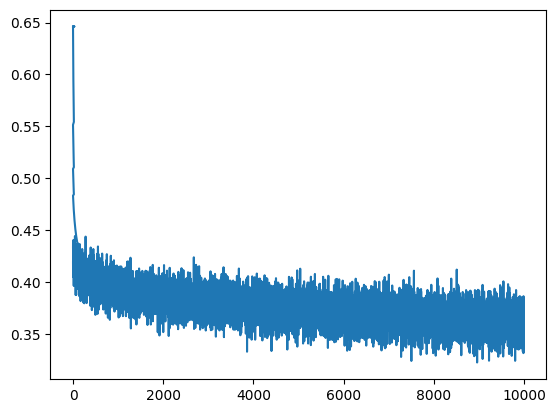

In [91]:
plt.plot(stepi, lossi)
plt.show()

In [ ]:
# compute the train and val loss

In [ ]:
# compute the train and val loss.  here are the initial results I got.  
# Improve the loss by playing with the hyper-params and learning rate policy and report the results here.

In [93]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 4)

for _ in range(20):
    
    out = []
    context = [0]*block_size
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1,-1)@W1 +b1)
      logits = h @ W2 + b2 
      probs = logits.softmax(dim=1)
      ix = torch.multinomial(probs, num_samples=1,generator = g).item()
      context = context[1:] +[ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

gara.
pyricwal.
nilla.
ash.
leraallani.
brianis.
joda.
ana.
aiz.
errays.
eeng.
coslazloreina.
aet.
elswa.
zolin.
brallatria.
aniah.
anela.
zaily.
lereael.
